**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
train=pd.read_csv("/content/train_PDjVQMB.csv")
test=pd.read_csv("/content/test_lTY72QC.csv")


In [ ]:
# merging train and test data into a single dataframe for further analysis
df=pd.concat([train,test])

In [ ]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1.0
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0.0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0.0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1.0
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1.0


**Analyzing the Patterns in the dataset**

In [ ]:
# checking shape
print(df.shape,'rows and columns')

(9501, 11) rows and columns


In [ ]:
# Checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9501 entries, 0 to 2850
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9501 non-null   object 
 1   Age                 9501 non-null   int64  
 2   Gender              9501 non-null   object 
 3   Income              9501 non-null   object 
 4   Balance             9501 non-null   float64
 5   Vintage             9501 non-null   int64  
 6   Transaction_Status  9501 non-null   int64  
 7   Product_Holdings    9501 non-null   object 
 8   Credit_Card         9501 non-null   int64  
 9   Credit_Category     9501 non-null   object 
 10  Is_Churn            6650 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 890.7+ KB


2 float data type, 4 integer data type and 5 object data type columns are present in the dataset.

In [ ]:
# Checking null values
df.isnull().sum()

ID                       0
Age                      0
Gender                   0
Income                   0
Balance                  0
Vintage                  0
Transaction_Status       0
Product_Holdings         0
Credit_Card              0
Credit_Category          0
Is_Churn              2851
dtype: int64

Null values are present in the dataset because we added both the dataframes.

In [ ]:
# dropping null values
df.dropna(axis=0,inplace=True)

In [ ]:
# checking null values again
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [ ]:
# Remoing ID column
del df['ID']

**EDA Nominal Data**

Male      3612
Female    3038
Name: Gender, dtype: int64


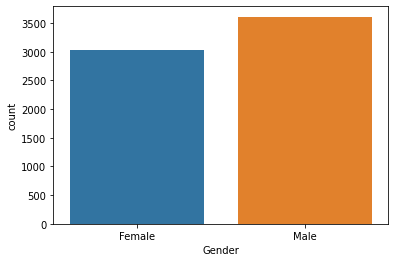

In [ ]:
# Gender
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

From the above observations the total number of males are 5157 and total number of females are is 4344, and there is not much difference.

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64


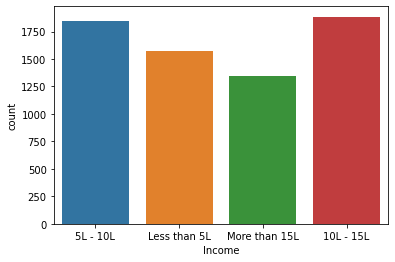

In [ ]:
# Income
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

In Yearly Income there are 4 unique values, that is customer's Income in the range of 10L - 15L, 5L - 10L, Less than 5L and More than 15L and there is not much difference between them.

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64


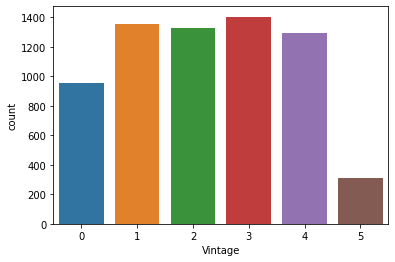

In [ ]:
# Vintage
ax=sns.countplot(x='Vintage',data=df)
print(df['Vintage'].value_counts())

In Vintage(No. of years the customer is associated with bank) column, vintage number 5 is very low that is 311 and vintage number 3 is more that is 456.

1    3430
0    3220
Name: Transaction_Status, dtype: int64


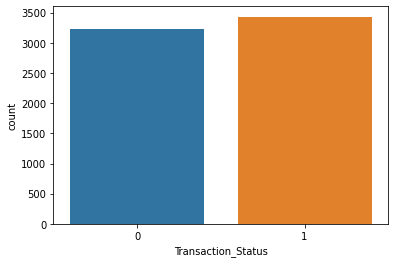

In [ ]:
# Transaction_Status
ax=sns.countplot(x='Transaction_Status',data=df)
print(df['Transaction_Status'].value_counts())

Transaction_Status(Whether the customer has done any transaction in the past 3 months or not) is of two type 0 and 1 that is basically yes and no and there is not much differnce between them.

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64


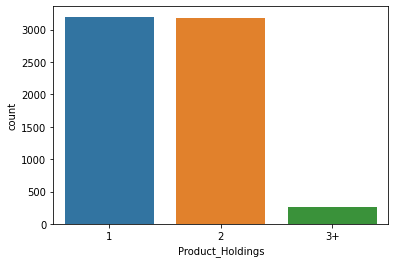

In [ ]:
# Product_Holdings
ax=sns.countplot(x='Product_Holdings',data=df)
print(df['Product_Holdings'].value_counts())

In Product_Holdings(No. of product holdings with the bank) column 3+ is very less than others.
  

1    4418
0    2232
Name: Credit_Card, dtype: int64


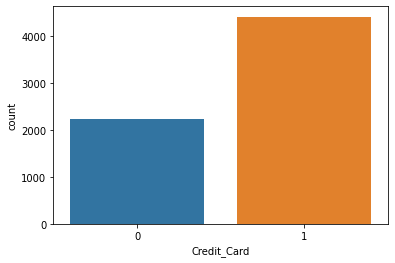

In [ ]:
# Credit_Card
ax=sns.countplot(x='Credit_Card',data=df)
print(df['Credit_Card'].value_counts())

Customers having Credit_Card is more.

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64


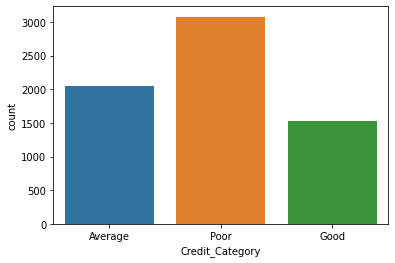

In [ ]:
# Credit_Category
ax=sns.countplot(x='Credit_Category',data=df)
print(df['Credit_Category'].value_counts())

Customers with Poor Credit_Category is more.

0.0    5113
1.0    1537
Name: Is_Churn, dtype: int64


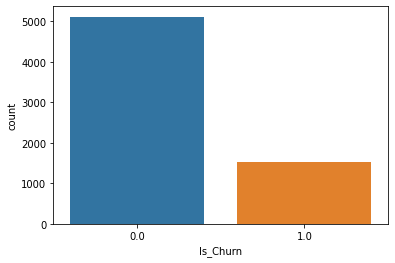

In [ ]:
# Is_Churn
ax=sns.countplot(x='Is_Churn',data=df)
print(df['Is_Churn'].value_counts())

In Is_Churn column(Whether the customer will churn in next 6 months or not), Very large differnce between the two unique category.

**EDA Distribution Plot**

In [ ]:
df.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category', 'Is_Churn'],
      dtype='object')

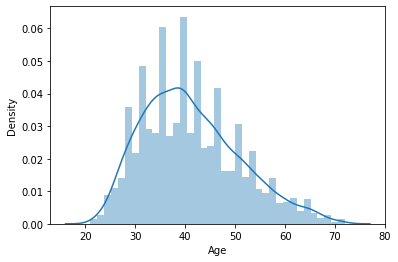

In [ ]:
# Age
sns.distplot(df['Age'],kde=True)

In Age column ages are in range from 20 to approx 75.

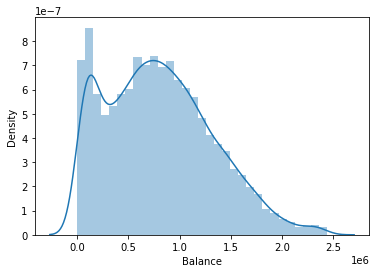

In [ ]:
# Balance
sns.distplot(df['Balance'],kde=True)

	
In Average column(Average quarterly balance of the customer), distribution plot is showing approximately normal distribution.

**Encoding object column**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc =OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

**Statistical Summary**

In [ ]:
df.describe()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
count,6650.000000,6650.000000,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,0.543158,1.357594,8.045954e+05,2.250226,0.515789,0.559098,0.664361,1.155338,0.231128
std,9.685747,0.498171,1.096052,5.157549e+05,1.458795,0.499788,0.571977,0.472249,0.863572,0.421586
min,21.000000,0.000000,0.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,1.000000,7.649386e+05,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,47.000000,1.000000,2.000000,1.147124e+06,3.000000,1.000000,1.000000,1.000000,2.000000,0.000000
max,72.000000,1.000000,3.000000,2.436616e+06,5.000000,1.000000,2.000000,1.000000,2.000000,1.000000


Numbers of values are same in every column.

Not Much differnce between mean and median.

Not much difference between 75% and max.


**Checking Correlation**

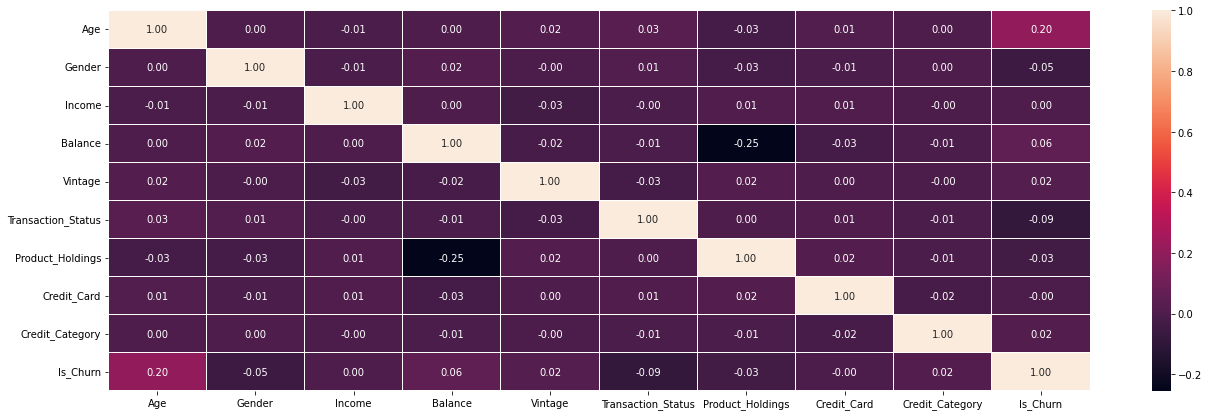

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Target Column Is_Churn looking negatively correlated with other columns.

Other columns are also looking negatively correlated with each other.

**Detecting Outlier**

Age                      AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Gender                AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Income                AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
Balance               AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Vintage               AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
Transaction_Status    AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
Product_Holdings      AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
Credit_Card           AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
Credit_Category          AxesSubplot(0.125,0.593621;0.0824468x0.130172)
Is_Churn              AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
dtype: object

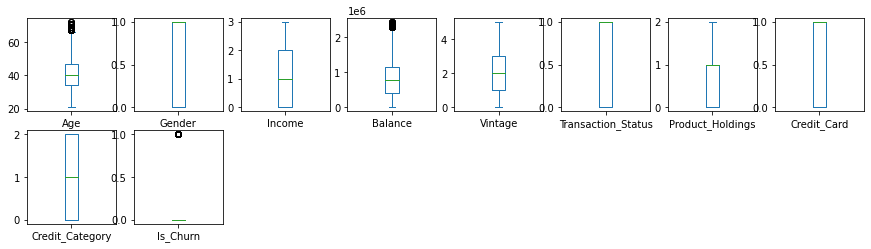

In [ ]:
df.plot(kind='box',subplots=True, layout=(5,8), figsize=(15,10))

Not Much outliers are Present.

**Seprating the columns into Feature and Target**

In [ ]:
x=df.drop('Is_Churn',axis=1)
y=df['Is_Churn']

**Handling Class Imbalance Problem on target column**

In [ ]:
# Because there is big differnce between both classes of Is_Churn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)

In [ ]:
y_over.value_counts()

1.0    5113
0.0    5113
Name: Is_Churn, dtype: int64

**Train Test Split**

In [ ]:
# y1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.43, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3790, 9)
(2860, 9)
(3790,)
(2860,)


**Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7723776223776224
[[2209    0]
 [ 651    0]]
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      2209
         1.0       0.00      0.00      0.00       651

    accuracy                           0.77      2860
   macro avg       0.39      0.50      0.44      2860
weighted avg       0.60      0.77      0.67      2860



In [ ]:
# Logistic Regression Cross Validation

scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7688721804511277


In [ ]:
# AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7706293706293706
[[2159   50]
 [ 606   45]]
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      2209
         1.0       0.47      0.07      0.12       651

    accuracy                           0.77      2860
   macro avg       0.63      0.52      0.49      2860
weighted avg       0.71      0.77      0.70      2860



In [ ]:
#For AdaBoostClassifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7682706766917293


In [ ]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7562937062937063
[[2089  120]
 [ 577   74]]
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      2209
         1.0       0.38      0.11      0.18       651

    accuracy                           0.76      2860
   macro avg       0.58      0.53      0.52      2860
weighted avg       0.69      0.76      0.70      2860



In [ ]:
# Random Forest Cross Validation

scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7538345864661654


In [ ]:
#DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6611888111888112
[[1701  508]
 [ 461  190]]
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      2209
         1.0       0.27      0.29      0.28       651

    accuracy                           0.66      2860
   macro avg       0.53      0.53      0.53      2860
weighted avg       0.67      0.66      0.67      2860



In [ ]:
# For DecisionTreeClassifier cross validation
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.6436090225563911


In [ ]:
# GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7723776223776224
[[2209    0]
 [ 651    0]]
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      2209
         1.0       0.00      0.00      0.00       651

    accuracy                           0.77      2860
   macro avg       0.39      0.50      0.44      2860
weighted avg       0.60      0.77      0.67      2860



In [ ]:
# For GaussianNb cross validation
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7688721804511277


After apllying 4 to 5 model, we can see the macro f1 score from each model.

**Hyper Parameter Tuning**

In [ ]:
# since we got high accuracy in Random Forest and GaussianNB so here we are taking random Forest For Hyper Parameter Tuning
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(max_depth=10,random_state=0)

grid_param={'criterion':['gini','entropy']}
           

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7678195488721805


In [ ]:
final_mod=RandomForestClassifier(criterion='entropy')
final_mod.fit(x_train,y_train)
predrf=final_mod.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7555944055944056
[[2100  109]
 [ 590   61]]
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      2209
         1.0       0.36      0.09      0.15       651

    accuracy                           0.76      2860
   macro avg       0.57      0.52      0.50      2860
weighted avg       0.68      0.76      0.70      2860



After Hyper Parameter Tuning We got macro avg of 50%.

**Saving the Model**

In [ ]:
submission=pd.read_csv("/content/sample_OoSmYo5.csv")

In [ ]:
submission['Is_Churn']=predrf
submission['ID']=test['ID']

In [ ]:
pd.DataFrame(submission, columns=['ID','Is_Churn']).to_csv('customer_churn.csv')

In [ ]:
# result
f=pd.read_csv('customer_churn.csv')
f.head()

,Unnamed: 0,ID,Is_Churn
0,0,55480787,0.0
1,1,9aededf2,0.0
2,2,a5034a09,0.0
3,3,b3256702,0.0
4,4,dc28adb5,1.0
